In [ ]:
import spacy
import pandas as pd
import numpy as np
import re
import string
from wordcloud import STOPWORDS
import os
os.chdir('/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers')

In [ ]:
dataset_fake = pd.read_csv( os.getcwd() + "/data/ISOT/Fake.csv.zip")
dataset_fake['label'] = 0
dataset_true = pd.read_csv (os.getcwd() + "/data/ISOT/True.csv.zip")
dataset_true['label'] = 1
ISOT_dataset = pd.concat([dataset_fake, dataset_true])

In [ ]:
FN_dataset = pd.read_csv(os.getcwd() + "/data/FakeNews/train.csv.zip")
FN_dataset.dropna(inplace=True)

In [ ]:
class DataPreprocessing():
    # python -m spacy download en_core_web_sm
    _nlp = spacy.load('en_core_web_sm')
    _punctuations= "?:!.,;"
    _stop_words = ["https", "ul", "-", " ", ".", "org", "wiki", "wikipedia", "will", "image", "s", "t", "m", "ve", "u", "said", \
                    "code", "span", "container", "imgur", "html", "jpg", "png", "jpeg", "nofollow", "quot",  "comment", \
                    "site", "SE", "tags", "comments", "moderators", "answers", "posts", "stackoverflow", "amp", "strike", \
                    "chat", "edit", "alt", "link", "exchange", "help", "votes", "noreferrer", "closed", "png", "h1", "new", \
                    "stackexchange", "class","users","questions", "topic", "meta", "stack", "href", "tag", "p", "em", "rel", \
                    "li", "user", "answer", "title", "h3", "moderator", "post", "vote", "blockquote", "strong","tagged", \
                    "question", "img", "page", '"', "\n"] + list(STOPWORDS)
        
    def process(self, data):
        # Lowercase
        data = data.lower()
        data = re.sub(' +', ' ', data)
        data = data.translate(str.maketrans('', '', string.punctuation + '"'))
        doc = self._nlp(data)

        # Tokenization and lemmatization 
        lemma_list = []
        for token in doc:
            lemma_list.append(token.lemma_)

        # Filter the stopword
        filtered_sentence = [] 
        for word in lemma_list:
            lexeme = self._nlp.vocab[word]
            if lexeme.is_stop == False and word not in self._stop_words:
                filtered_sentence.append(word) 

        # Remove punctuation
        for word in filtered_sentence:
            if word in self._punctuations:
                filtered_sentence.remove(word)
        
        return " ".join(filtered_sentence)

In [ ]:
dataPreprocessing = DataPreprocessing()

In [ ]:
num_rows_per_cat = 1000
ISOT_res_true = ISOT_dataset['text'][ISOT_dataset["label"] == 1][0:num_rows_per_cat].apply(dataPreprocessing.process)
ISOT_res_fake = ISOT_dataset['text'][ISOT_dataset["label"] == 0][0:num_rows_per_cat].apply(dataPreprocessing.process)

In [ ]:
if not os.path.isdir(os.getcwd() + "/TextGAN-PyTorch/dataset") : os.mkdir(os.getcwd() + "/TextGAN-PyTorch/dataset")
if not os.path.isdir(os.getcwd() + "/TextGAN-PyTorch/dataset/testdata") : os.mkdir(os.getcwd() + "/TextGAN-PyTorch/dataset/testdata")

In [ ]:
with open(os.getcwd() + "/TextGAN-PyTorch/dataset/docs_cat1.txt", "w") as output:
    output.write(".\n".join(doc for doc in ISOT_res_true[:int(num_rows_per_cat*0.7)]))
  
with open(os.getcwd() + "/TextGAN-PyTorch/dataset/docs_cat0.txt", "w") as output:
    output.write(".\n".join(doc for doc in ISOT_res_fake[:int(num_rows_per_cat*0.7)]))

with open(os.getcwd() + "/TextGAN-PyTorch/dataset/testdata/docs_cat1_test.txt", "w") as output:
    output.write(".\n".join(doc for doc in ISOT_res_true[int(num_rows_per_cat*0.7):]))
  
with open(os.getcwd() + "/TextGAN-PyTorch/dataset/testdata/docs_cat0_test.txt", "w") as output:
    output.write(".\n".join(doc for doc in ISOT_res_fake[int(num_rows_per_cat*0.7):]))

with open(os.getcwd() + "/TextGAN-PyTorch/dataset/docs.txt", "w") as output:
    all_data_train = (".\n".join(doc for doc in ISOT_res_fake[:int(num_rows_per_cat*0.7)])
                + ".\n".join(doc for doc in ISOT_res_true[:int(num_rows_per_cat*0.7)]))
    output.write(all_data_train)

with open(os.getcwd() + "/TextGAN-PyTorch/dataset/testdata/docs_test.txt", "w") as output:
    all_data_test = (".\n".join(doc for doc in ISOT_res_fake[int(num_rows_per_cat*0.7):])
                + ".\n".join(doc for doc in ISOT_res_true[int(num_rows_per_cat*0.7):]))
    output.write(all_data_test)

In [ ]:
liar_train = pd.read_table(os.getcwd() +"/data/LIAR/train.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
liar_test = pd.read_table(os.getcwd() +"/data/LIAR/test.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
liar_valid = pd.read_table(os.getcwd() +"/data/LIAR/valid.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

In [ ]:
liar_train.head()

,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
labels = np.unique(liar_train.label).tolist()
labels

['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

In [ ]:
def write_data(train_data, test_data, count):  
  with open(os.getcwd() + f"/TextGAN-PyTorch/dataset/docs_cat{count}.txt", "w") as output:
      output.write(train_data)
  with open(os.getcwd() + f"/TextGAN-PyTorch/dataset/testdata/docs_cat{count}_test.txt", "w") as output:
      output.write(test_data)

In [ ]:
with open(os.getcwd() + f"/TextGAN-PyTorch/dataset/docs.txt", "w") as output:
    output.write(".\n".join(statement for statement in liar_train.statement.tolist()).replace("'", ""))

with open(os.getcwd() + f"/TextGAN-PyTorch/dataset/testdata/docs_test.txt", "w") as output:
    output.write(".\n".join(statement for statement in liar_test.statement.tolist()).replace("'", ""))


In [ ]:
for count, label in enumerate(labels):
  train_text_data_for_label = ".\n".join(statement for statement in liar_train[liar_train["label"] == label].statement.tolist()).replace("'", "")
  test_text_data_for_label = ".\n".join(statement for statement in liar_test[liar_test["label"] == label].statement.tolist()).replace("'", "")
  write_data(train_text_data_for_label, test_text_data_for_label, count)

In [8]:
!sudo apt-get install libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [1]:
!pip install kenlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.0/425.0 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kenlm: filename=kenlm-0.1-cp38-cp38-linux_x86_64.whl size=2395691 sha256=94986fd1dbe471d1c38e66497734b76ceb20fa872fc49cdc76227786fb1c9225
  Stored in directory: /root/.cache/pip/wheels/d4/3c/44/389ed64995f0e7382ab7c38ef13e57fb1a5e5e111350ce6807
Successfully built kenlm


In [4]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=1c7a28ad375f0b24bfc904e7cd294d9e8f0180e9d0ae0084bf8950a25d92cfd5
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [5]:
import wandb
wandb.init()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [11]:
!mkdir /content/local/
!rsync -av --progress /content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/ /content/local/ --exclude TextGAN-PyTorch/save 

mkdir: cannot create directory ‘/content/local/’: File exists
sending incremental file list
TextGAN-PyTorch/savefig/
TextGAN-PyTorch/savefig/SeqGAN.png
         11,196 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=44/273)
TextGAN-PyTorch/utils/
TextGAN-PyTorch/utils/cat_data_loader.py
          6,409 100%    6.11MB/s    0:00:00 (xfr#2, to-chk=43/273)
TextGAN-PyTorch/utils/data_loader.py
          4,339 100%    4.14MB/s    0:00:00 (xfr#3, to-chk=42/273)
TextGAN-PyTorch/utils/data_utils.py
          6,818 100%    2.17MB/s    0:00:00 (xfr#4, to-chk=41/273)
TextGAN-PyTorch/utils/gan_loss.py
          6,192 100%    1.18MB/s    0:00:00 (xfr#5, to-chk=40/273)
TextGAN-PyTorch/utils/helpers.py
          5,887 100%  958.17kB/s    0:00:00 (xfr#6, to-chk=39/273)
TextGAN-PyTorch/utils/rollout.py
          7,842 100%    1.25MB/s    0:00:00 (xfr#7, to-chk=38/273)
TextGAN-PyTorch/utils/text_process.py
         12,292 100%    1.67MB/s    0:00:00 (xfr#8, to-chk=37/273)
TextGAN-PyTorch/utils/visualization.p

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 824777859961521315
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 40213086208
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12840779883011119668
 physical_device_desc: "device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
 xla_global_id: 416903419]

In [ ]:
!cd /content/local/TextGAN-PyTorch/ && python3 main.py --run_model="sentigan" \
--dataset="docs"

In [36]:
import matplotlib.pyplot as plt

title_dict = {
    'gen_pre_loss': 'pre_loss',
    'gen_adv_loss': 'g_loss',
    'gen_mana_loss': 'mana_loss',
    'gen_work_loss': 'work_loss',
    'c_loss' : 'c_loss',
    'c_acc' : 'c_acc',
    'dis_loss': 'd_loss',
    'dis_train_acc': 'train_acc',
    'dis_eval_acc': 'eval_acc',
    'NLL_oracle': 'NLL_oracle',
    'NLL_gen': 'NLL_gen',
    'BLEU-3': 'BLEU-3',
}

color_list = ['#e74c3c', '#e67e22', '#f1c40f', '#8e44ad', '#2980b9', '#27ae60', '#16a085']


def plt_data(data, step, title, c_id, savefig=False):
    x = [i for i in range(step)]
    plt.plot(x, data, color=color_list[c_id], label=title)
    if savefig:
        plt.savefig('/content/local/TextGAN-PyTorch/savefig/' + title + '.png')


def get_log_data(filename):
    with open(filename, 'r') as fin:
        all_lines = fin.read().strip().split('\n')
        data_dict = {'pre_loss': [], 'g_loss': [], 'mana_loss': [], 'work_loss': [],
                     'd_loss': [], 'train_acc': [], 'eval_acc': [], 'NLL_oracle': [],
                     'NLL_gen': [], 'BLEU-3': [], 'c_loss': [], 'c_acc': []}

        for line in all_lines:
            items = line.split()
            try:
                for key in data_dict.keys():
                    if key in items:
                        data_dict[key].append(float(items[items.index(key) + 2][:-1]))
            except:
                break

    return data_dict

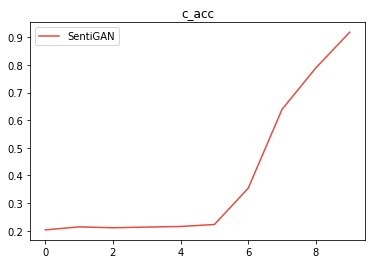

In [40]:
  log_file_root = '/content/local/TextGAN-PyTorch/log/'
  # Custom your log files in lists, no more than len(color_list)
  log_file_list = ['log_0115_1811_42']
  legend_text = ['SentiGAN']

  color_id = 0
  data_name = 'c_acc'
  if_save = True
  # legend_text = log_file_list

  assert data_name in title_dict.keys(), 'Error data name'
  plt.clf()
  plt.title(data_name)
  all_data_list = []
  for idx, item in enumerate(log_file_list):
      log_file = log_file_root + item + '.txt'

      # save log file
      all_data = get_log_data(log_file)
      plt_data(all_data[title_dict[data_name]], len(all_data[title_dict[data_name]]),
                legend_text[idx], color_id, if_save)
      color_id += 1

  plt.legend()
  plt.show()


In [38]:
all_data

{'pre_loss': [5.4063],
 'g_loss': [],
 'mana_loss': [],
 'work_loss': [],
 'd_loss': [],
 'train_acc': [],
 'eval_acc': [0.2058,
  0.2071,
  0.2057,
  0.2063,
  0.2056,
  0.213,
  0.2077,
  0.2054,
  0.2031,
  0.1966],
 'NLL_oracle': [],
 'NLL_gen': [],
 'BLEU-3': [],
 'c_loss': [1.7797,
  1.7546,
  1.7445,
  1.7341,
  1.7053,
  1.6223,
  1.4638,
  1.0859,
  0.5704,
  0.2756],
 'c_acc': [0.2031,
  0.2141,
  0.2109,
  0.2133,
  0.2156,
  0.2227,
  0.3539,
  0.6391,
  0.7891,
  0.918]}

In [45]:
!yes | cp -rf /content/local/TextGAN-PyTorch /content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/